In [53]:
# importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [101]:
# Building sine wave dataset

x = 0.1*np.arange(1000)
data = np.sin(x)

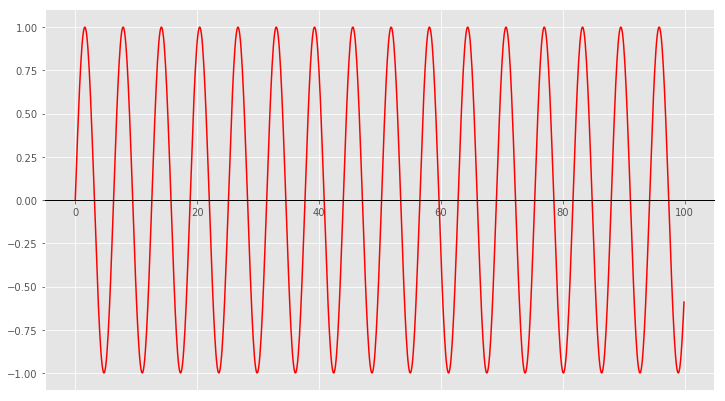

In [209]:
# Ploting Sine wave with generated dataset 

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['bottom'].set_position('center')
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_xlim(0,100,auto=True)

plt.plot(x,data, 'r')

plt.show()

In [55]:
# Scaling down the raw data with MinMaxScaler()

scaler = MinMaxScaler(feature_range=(0.01, 1))
data_scaled = scaler.fit_transform(data.reshape(-1,1))

In [56]:
data_scaled = data_scaled.flatten()

In [58]:
# Splitting the scaled data into training dataset

training_dataset = data_scaled[:-150]

In [59]:
# Splitting the scaled data into test dataset, this dataset won't be used in LSTM model training

test_dataset = data_scaled[-(150+20):]

In [60]:
# Preparing the training dataset for LSTM input 

T = 20
X = []
Y = []

for t in range(len(training_dataset)-T):
  x = training_dataset[t:t+T]
  X.append(x)
  y = training_dataset[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.Shape:",X.shape, "Y.Shape:", Y.shape)

X.Shape: (830, 20, 1) Y.Shape: (830,)


In [61]:
# Preparing the test dataset for series of numbers prediction with LSTM trained model 

T = 20
X_test = []
Y_test = []

for t in range(len(test_dataset)-T):
  x = test_dataset[t:t+T]
  X_test.append(x)
  y = test_dataset[t+T]
  Y_test.append(y)
X_test = np.array(X_test).reshape(-1, T, 1)
Y_test = np.array(Y_test)
NN = len(X_test)

print("X_test.Shape:",X_test.shape, "Y_test.Shape:", Y_test.shape)

X_test.Shape: (150, 20, 1) Y_test.Shape: (150,)


In [62]:
# Splitting training dataset again into x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
print("x_train.shape:",x_train.shape, "x_test.shape:",x_test.shape, "y_train.shape:",y_train.shape, "y_test.shape:",y_test.shape)

x_train.shape: (664, 20, 1) x_test.shape: (166, 20, 1) y_train.shape: (664,) y_test.shape: (166,)


In [76]:
# Building LSTM model 

model = keras.Sequential()
model.add(keras.layers.LSTM((20), batch_input_shape=(None,20,1), return_sequences=True))
model.add(keras.layers.LSTM((1), activation='relu', return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [77]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 20, 20)            1760      
_________________________________________________________________
lstm_15 (LSTM)               (None, 1)                 88        
Total params: 1,848
Trainable params: 1,848
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Fitting splitted dataset into the model

r = model.fit(x_train.reshape(664,20,1), y_train, epochs=10, validation_data=(x_test.reshape(166,20,1), y_test))

Train on 664 samples, validate on 166 samples
Epoch 1/10
664/664 [==============================] - 2s 4ms/sample - loss: 0.2971 - acc: 0.0015 - val_loss: 0.2308 - val_acc: 0.0000e+00
Epoch 2/10
664/664 [==============================] - 0s 669us/sample - loss: 0.2294 - acc: 0.0015 - val_loss: 0.2147 - val_acc: 0.0000e+00
Epoch 3/10
664/664 [==============================] - 1s 760us/sample - loss: 0.2072 - acc: 0.0015 - val_loss: 0.1881 - val_acc: 0.0000e+00
Epoch 4/10
664/664 [==============================] - 0s 683us/sample - loss: 0.1835 - acc: 0.0015 - val_loss: 0.1663 - val_acc: 0.0000e+00
Epoch 5/10
664/664 [==============================] - 0s 674us/sample - loss: 0.1497 - acc: 0.0015 - val_loss: 0.1157 - val_acc: 0.0000e+00
Epoch 6/10
664/664 [==============================] - 0s 673us/sample - loss: 0.0736 - acc: 0.0015 - val_loss: 0.0360 - val_acc: 0.0000e+00
Epoch 7/10
664/664 [==============================] - 0s 713us/sample - loss: 0.0259 - acc: 0.0015 - val_loss: 0.020

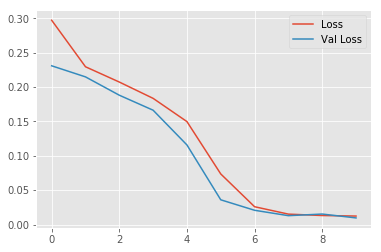

In [220]:
plt.style.use('ggplot')
plt.plot(r.history['loss'], label="Loss")
plt.plot(r.history['val_loss'], label="Val Loss")
plt.legend()
plt.show()
plt.rcParams['figure.figsize'] = 6,4

In [80]:
# Predicting y_test when x_test is feeded into the model

result = model.predict(x_test.reshape(166,20,1))

In [210]:
# reversing predicted y_test values 

scaler.inverse_transform(result).flatten()

array([-0.65432894, -0.5798918 , -0.50019395, -0.4152935 , -0.32529265,
       -0.2304423 , -0.13124566, -0.02854821,  0.07640867,  0.18198922,
        0.286238  ,  0.38703555,  0.48230782,  0.57025623,  0.6495425 ,
        0.71939135,  0.7795767 ,  0.830317  ,  0.87210506,  0.90552866,
        0.9311181 ,  0.9492427 ,  0.9600715 ,  0.9635743 ,  0.95956445,
        0.94775707,  0.9278308 ,  0.8994914 ,  0.86251956,  0.81681085,
        0.76240045,  0.6994838 ,  0.6284189 ,  0.54972965,  0.464097  ,
        0.37234834,  0.27544194,  0.1744496 ,  0.07053567, -0.03506464,
       -0.14106844, -0.24616651, -0.34904978, -0.44843063, -0.54306746,
       -0.63178533, -0.7095515 , -0.7628341 , -0.80643475, -0.83807176,
       -0.8659975 , -0.88458955, -0.90066713, -0.9140077 , -0.924455  ,
       -0.93192816, -0.9364255 , -0.93802077, -0.93220335, -0.8872357 ,
       -0.8351419 , -0.77660805, -0.71216816, -0.64218384, -0.56685704,
       -0.4862804 , -0.4005125 , -0.30967298, -0.21404825, -0.11

In [83]:
# look into original y_test values

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

array([-0.6556464 , -0.57698987, -0.49256825, -0.40322505, -0.30985296,
       -0.21338492, -0.11478481, -0.01503781,  0.08485944,  0.18390881,
        0.28112062,  0.37552357,  0.46617441,  0.55216738,  0.63264329,
        0.70679803,  0.77389068,  0.83325087,  0.88428549,  0.92648463,
        0.95942663,  0.98278237,  0.99631846,  0.99989967,  0.99349022,
        0.97715414,  0.95105465,  0.91545255,  0.87070354,  0.81725475,
        0.75564023,  0.68647559,  0.61045192,  0.52832881,  0.44092682,
        0.34911923,  0.25382336,  0.15599137,  0.05660077, -0.04335537,
       -0.14287832, -0.24097368, -0.3366613 , -0.42898512, -0.51702266,
       -0.59989428, -0.67677196, -0.74688755, -0.80954049, -0.86410477,
       -0.9100352 , -0.94687286, -0.97424968, -0.99189211, -0.99962389,
       -0.99736776, -0.98514626, -0.9630815 , -0.93139395, -0.89040023,
       -0.84050991, -0.7822215 , -0.71611739, -0.64285807, -0.56317553,
       -0.47786592, -0.38778164, -0.29382276, -0.19692811, -0.09

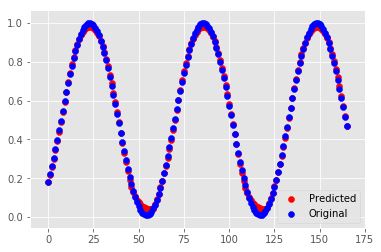

In [84]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.scatter(range(166), result, c='r', label="Predicted")
plt.scatter(range(166),y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

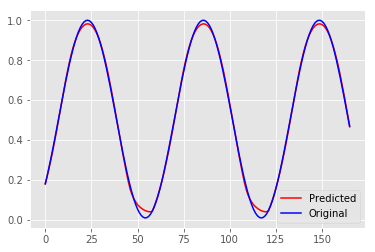

In [85]:
# Plotting y_test and predicted y_test 

plt.style.use('ggplot')
plt.plot(result, c='r', label="Predicted")
plt.plot(y_test, c='b', label="Original")
plt.legend(loc ="lower right") 
plt.show()

In [86]:
# Testing the model with untrain dataset X_test 

result_01 = model.predict(X_test).flatten()

In [87]:
result_01

array([0.4175914 , 0.3658642 , 0.31544945, 0.2669781 , 0.22105493,
       0.17824796, 0.14465304, 0.11904562, 0.1003664 , 0.08525996,
       0.073101  , 0.0643023 , 0.05678868, 0.05065987, 0.04598102,
       0.04277899, 0.04104167, 0.04072116, 0.05062322, 0.0741102 ,
       0.10100348, 0.13098642, 0.16382307, 0.19936271, 0.23752698,
       0.27828062, 0.3215899 , 0.36737376, 0.41545105, 0.4654921 ,
       0.51698136, 0.5692036 , 0.6212621 , 0.6721361 , 0.72077394,
       0.766204  , 0.8076416 , 0.84456223, 0.876723  , 0.90413237,
       0.92697823, 0.9455389 , 0.9600988 , 0.97088486, 0.9780309 ,
       0.9815692 , 0.98144263, 0.97752994, 0.9696777 , 0.9577298 ,
       0.94155675, 0.92107636, 0.89627045, 0.86719584, 0.83399004,
       0.7968716 , 0.75613946, 0.7121684 , 0.6654016 , 0.61634296,
       0.56554735, 0.51361036, 0.46115667, 0.40882936, 0.357278  ,
       0.30714637, 0.25906214, 0.21362437, 0.1713939 , 0.14018603,
       0.11497831, 0.09771005, 0.08289091, 0.07153683, 0.06294

In [89]:
# look into original Y_test values

scaler.inverse_transform(Y_test.reshape(-1,1)).flatten()

array([-0.17607562, -0.27346966, -0.36813128, -0.45911465, -0.54551071,
       -0.6264562 , -0.70114234, -0.76882291, -0.82882165, -0.88053907,
       -0.92345845, -0.95715093, -0.98127987, -0.99560419, -0.99998077,
       -0.99436586, -0.97881558, -0.9534853 , -0.91862811, -0.87459229,
       -0.82181784, -0.76083205, -0.69224428, -0.61673983, -0.53507312,
       -0.44806014, -0.35657029, -0.26151771, -0.16385213, -0.06454939,
        0.0353983 ,  0.13499231,  0.23323751,  0.32915229,  0.42177828,
        0.51019001,  0.59350408,  0.67088806,  0.74156875,  0.80483992,
        0.86006941,  0.90670536,  0.94428181,  0.97242331,  0.99084868,
        0.99937382,  0.99791354,  0.98648244,  0.96519474,  0.93426312,
        0.89399666,  0.84479768,  0.78715777,  0.72165283,  0.64893737,
        0.56973795,  0.48484589,  0.39510941,  0.30142514,  0.20472912,
        0.10598751,  0.00618691, -0.0936755 , -0.19260194, -0.28960397,
       -0.38371236, -0.47398683, -0.55952539, -0.63947334, -0.71

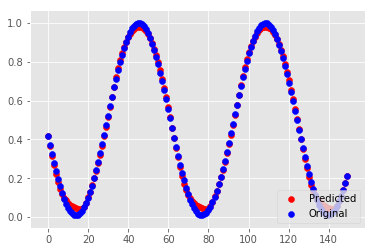

In [221]:
# Plotting Y_test and predicted Y_test 

plt.style.use('ggplot')
plt.scatter(range(150), result_01, c='r', label="Predicted")
plt.scatter(range(150),Y_test, c='b', label="Original")
plt.legend(loc ="lower right")
plt.show()

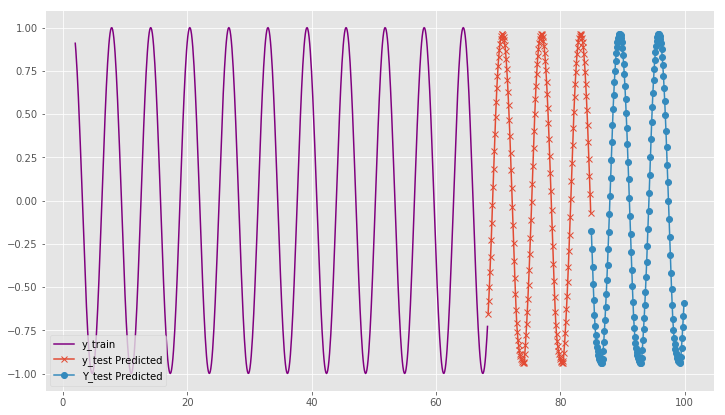

In [215]:
# Plotting y_train, predicted y_test and predicted Y_test 

fig, ax1 = plt.subplots()

scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


ax1.plot(x[20:-150][:664], scaler.inverse_transform(y_train.reshape(-1,1)).flatten(), c='purple', label='y_train')
# ax1.plot(x[20:-150][664:], scaler.inverse_transform(y_test.reshape(-1,1)).flatten(), 'c-', label='y_test')
# ax1.plot(x[850:], scaler.inverse_transform(Y_test.reshape(-1,1)).flatten(), 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], scaler.inverse_transform(result.reshape(-1,1)).flatten(), 'x-', label='y_test Predicted')
ax1.plot(x[850:], scaler.inverse_transform(result_01.reshape(-1,1)).flatten(), 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7

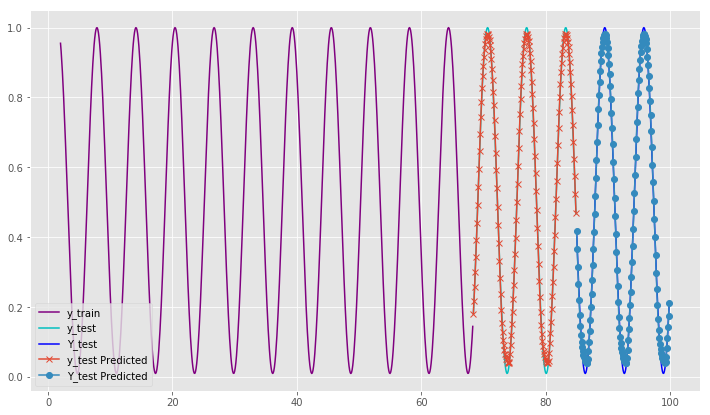

In [208]:
# Plotting y_train, y_test, Y_test, predicted y_test and predicted Y_test

fig, ax1 = plt.subplots()

ax1.plot(x[20:-150][:664], y_train, c='purple', label='y_train')
ax1.plot(x[20:-150][664:], y_test, 'c-', label='y_test')
ax1.plot(x[850:], Y_test, 'b-', label='Y_test')
ax1.plot(x[20:-150][664:], result, 'x-', label='y_test Predicted')
ax1.plot(x[850:], result_01, 'o-', label='Y_test Predicted')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
plt.legend(loc='lower left')
plt.show()
plt.rcParams['figure.figsize'] = 12,7